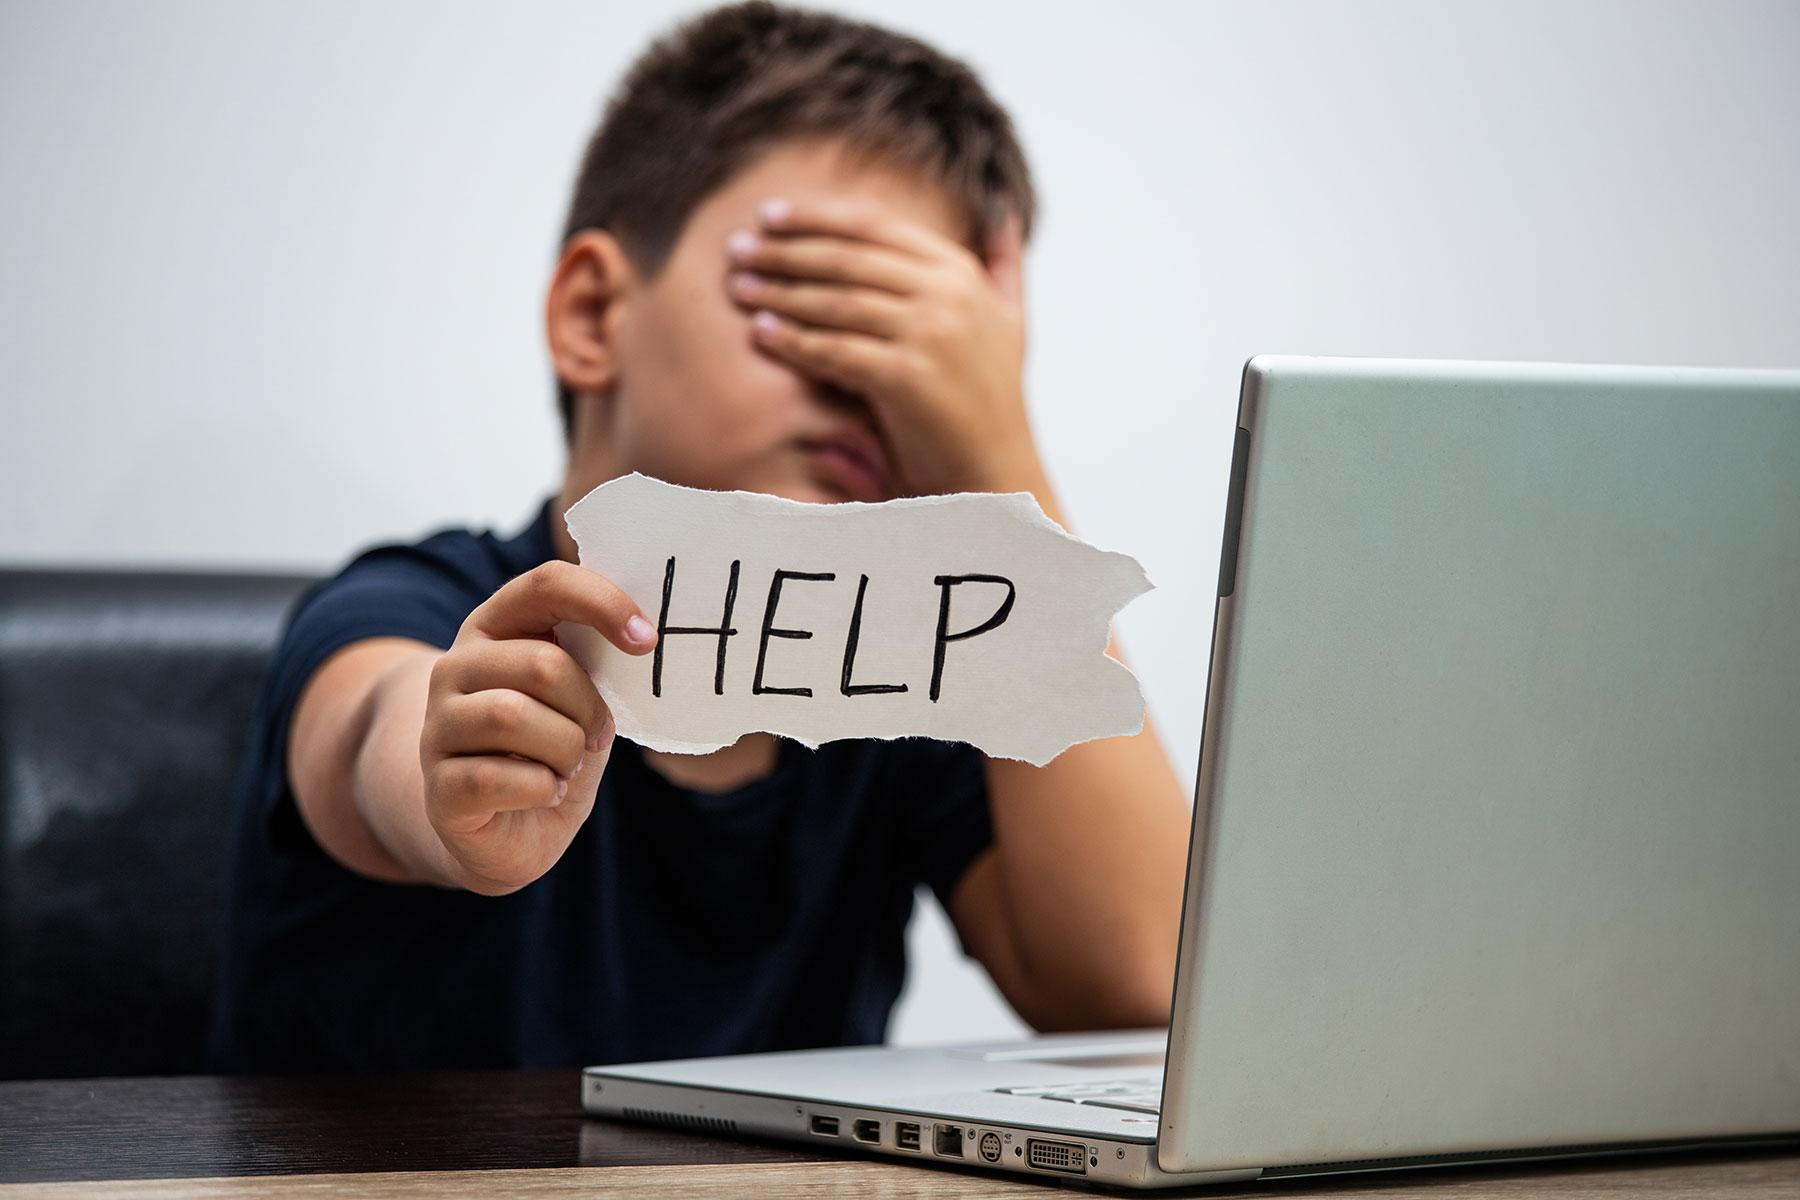

# CYBERSECURITY BEHAVIOUR PREDICTION-TEENAGERS



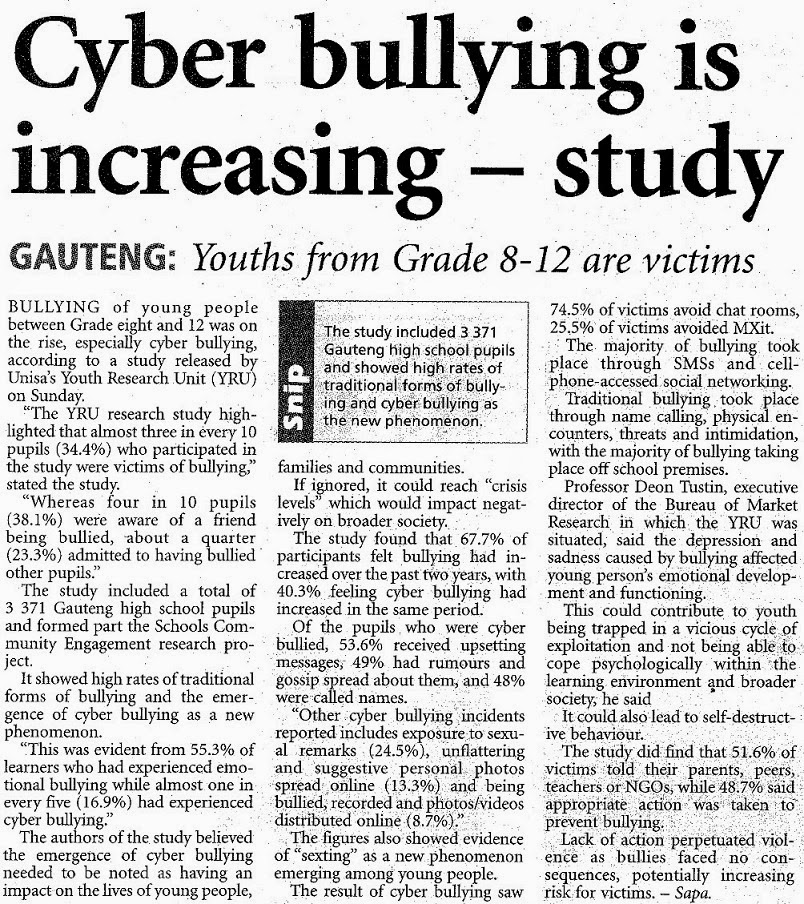

## Objective of the Project

The primary goal of this project is to predict the cybersecurity behavior category of teenagers based on their digital activities and safety practices. By using machine learning techniques, the project will classify teenagers into predefined behavior categories to better understand patterns of safe or unsafe behavior in the digital space. This could potentially help in identifying areas where further education or intervention might be necessary to promote safer online behavior.

## steps:
#### .Clean and preprocess the dataset.
#### .Perform exploratory data analysis (EDA)
#### .Build a machine learning model to predict the Cybersecurity_Behavior_Category.
#### .Evaluate model performance and provide insights

## Introduction to the Project

In today’s increasingly digital world, cybersecurity is a growing concern, especially for younger users who are more active online. Teenagers often engage with various online platforms, social media, and digital services, exposing them to potential risks such as malware attacks, phishing attempts, and data breaches. These risks can vary depending on user behavior, device security practices, and overall online awareness.

This project, titled Cybersecurity Behavior Category Prediction, aims to classify users into three categories: Safe, Neutral, and Risky based on their cybersecurity practices and online behavior. By analyzing data such as malware detections, phishing attempts, social media usage, and login security, we can better understand the online habits that contribute to risky cybersecurity behaviors.

## Problem Statement

The problem addressed in this project is the prediction of a user’s Cybersecurity Behavior Category based on their interaction with the internet, device usage, and security habits. The objective is to create a model that accurately identifies whether a user is likely to engage in safe, neutral, or risky behavior based on their digital footprint. This prediction can help in targeted awareness campaigns, policy formulation, and personalized cybersecurity interventions to enhance overall safety online.

By analyzing the dataset, we seek to uncover key patterns and factors that influence risky online behavior, helping to predict and prevent potential cybersecurity threats among teenage users.

## About Dataset

This dataset captures the real-world online behavior of teenagers, focusing on e-safety awareness, cybersecurity risks, and device interactions. The data was collected from network activity logs and e-safety monitoring systems across various educational institutions and households in Texas and California. Spanning from January 2017 to October 2024, this dataset includes interactions with social media platforms, educational websites, and other online services, providing an in-depth look at teenage online activities in urban and suburban settings. The dataset is anonymized to protect user privacy and contains real incidents of network threats, security breaches, and cybersecurity behavior patterns observed in teenagers.

## Data Features:

The dataset consists of 30 columns, which can be grouped into the following categories:

## User Demographics:

1.Age_Group: Age category of the user (e.g., Teen, Adult).

2.Geolocation: Represents the user’s location, possibly country or region.

## Device and Network Usage:

1.Device_Type: Type of device used by the user (e.g., Mobile, Desktop).

2.Network_Type: Type of network the user is connected to (e.g., Public, Private).

3.Public_Network_Usage: Frequency of using public networks.

## Cybersecurity Practices and Alerts:

1.Malware_Detection: Number of malware detections.

2.Phishing_Attempts: Number of phishing attempts the user has faced.

3.VPN_Usage: Whether the user uses a VPN for secure browsing.

4.Firewall_Logs, Parental_Control_Alerts

5.Data_Breach_Notifications: Logs and alerts indicating cybersecurity events or safety measures.

## Online Behavior:

1.Social_Media_Usage: Frequency of social media use (Low, Medium, High).

2.Hours_Online: Total hours spent online by the user.

3.Website_Visits, Risky_Website_Visits: Number of websites visited and how many were risky.

## Security Features:

1.Password_Strength: Strength of the user’s passwords (Weak, Moderate, Strong).
2.Insecure_Login_Attempts: Number of insecure login attempts.

## Risk Scores and Awareness:

1.Download_Risk, Online_Purchase_Risk: Indicate risks associated with downloads or online purchases.

2.E_Safety_Awareness_Score: Measures user awareness of online safety.

## Target Variable:

### Cybersecurity_Behavior_Category:  The label we aim to predict, representing the user's overall cybersecurity behavior, categorized as Safe, Neutral, or Risky.

Dataset Link-
gokul r.s
  8:25 PM
https://www.kaggle.com/code/tariqalbarrak/predicting-teenager-cyber-security-behavior/input

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Load the dataset
data = pd.read_csv("/content/teenager_safety_datasets.csv")

In [ ]:
# Display the first few rows of the dataset to ensure successful import
print("Dataset Preview:")
data.head()

Dataset Preview:


,Timestamp,Device_Type,Malware_Detection,Phishing_Attempts,Social_Media_Usage,VPN_Usage,Cyberbullying_Reports,Parental_Control_Alerts,Firewall_Logs,Login_Attempts,...,Website_Visits,Peer_Interactions,Risky_Website_Visits,Cloud_Service_Usage,Unencrypted_Traffic,Ad_Clicks,Insecure_Login_Attempts,E_Safety_Awareness_Score,Malware_Exposure_Risk,Cybersecurity_Behavior_Category
0,1/1/2017 0:00,Mobile,0,0,Low,0,0,0,4,2,...,2,Low,0,0,0,0,0,Moderate,1,Safe
1,1/1/2017 1:00,Desktop,0,0,Low,0,0,0,4,2,...,4,Low,0,0,0,0,0,Moderate,0,Neutral
2,1/1/2017 2:00,Laptop,0,0,Low,0,0,0,0,1,...,2,Low,0,0,0,0,0,Moderate,0,Neutral
3,1/1/2017 3:00,Mobile,0,0,Low,0,0,1,2,3,...,3,Low,0,0,0,1,1,Moderate,0,Safe
4,1/1/2017 4:00,Mobile,0,1,Medium,0,0,0,2,3,...,3,Low,0,0,0,0,0,Moderate,0,Risky


In [ ]:
# Check the structure of the dataset
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67921 entries, 0 to 67920
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Timestamp                        67921 non-null  object 
 1   Device_Type                      67921 non-null  object 
 2   Malware_Detection                67921 non-null  int64  
 3   Phishing_Attempts                67921 non-null  int64  
 4   Social_Media_Usage               67921 non-null  object 
 5   VPN_Usage                        67921 non-null  int64  
 6   Cyberbullying_Reports            67921 non-null  int64  
 7   Parental_Control_Alerts          67921 non-null  int64  
 8   Firewall_Logs                    67921 non-null  int64  
 9   Login_Attempts                   67921 non-null  int64  
 10  Download_Risk                    67921 non-null  int64  
 11  Password_Strength                67921 non-null  object 
 12  Dat

 The dataset consists of 30 columns and 67,921 entries,with features related to online activities and cybersecurity behaviors among teenagers

In [ ]:
# Drop irrelevant columns 'Timestamp'
data.drop(columns=['Timestamp'], inplace=True)
data

,Device_Type,Malware_Detection,Phishing_Attempts,Social_Media_Usage,VPN_Usage,Cyberbullying_Reports,Parental_Control_Alerts,Firewall_Logs,Login_Attempts,Download_Risk,...,Website_Visits,Peer_Interactions,Risky_Website_Visits,Cloud_Service_Usage,Unencrypted_Traffic,Ad_Clicks,Insecure_Login_Attempts,E_Safety_Awareness_Score,Malware_Exposure_Risk,Cybersecurity_Behavior_Category
0,Mobile,0,0,Low,0,0,0,4,2,0,...,2,Low,0,0,0,0,0,Moderate,1,Safe
1,Desktop,0,0,Low,0,0,0,4,2,0,...,4,Low,0,0,0,0,0,Moderate,0,Neutral
2,Laptop,0,0,Low,0,0,0,0,1,0,...,2,Low,0,0,0,0,0,Moderate,0,Neutral
3,Mobile,0,0,Low,0,0,1,2,3,0,...,3,Low,0,0,0,1,1,Moderate,0,Safe
4,Mobile,0,1,Medium,0,0,0,2,3,0,...,3,Low,0,0,0,0,0,Moderate,0,Risky
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67916,Tablet,0,0,Low,0,0,0,5,1,1,...,4,Low,0,0,0,0,0,Moderate,0,Neutral
67917,Mobile,0,0,Low,0,0,1,2,1,1,...,5,Low,0,0,0,0,0,High,0,Safe
67918,Mobile,0,0,Low,0,0,0,0,1,0,...,1,Low,0,0,0,0,0,Low,0,Safe
67919,Laptop,0,0,Low,0,0,1,0,1,0,...,3,Low,0,0,0,0,0,Low,0,Safe


 Removes the column 'Timestamp' from the DataFrame. This is done because the timestamp might not provide useful information for predicting the cybersecurity behavior of teenagers.

In [ ]:
# Summary statistics of numerical features
print("Summary Statistics (Numerical):")
data.describe()

Summary Statistics (Numerical):


,Malware_Detection,Phishing_Attempts,VPN_Usage,Cyberbullying_Reports,Parental_Control_Alerts,Firewall_Logs,Login_Attempts,Download_Risk,Data_Breach_Notifications,Online_Purchase_Risk,Public_Network_Usage,Hours_Online,Website_Visits,Risky_Website_Visits,Cloud_Service_Usage,Unencrypted_Traffic,Ad_Clicks,Insecure_Login_Attempts,Malware_Exposure_Risk
count,67921.000000,67921.000000,67921.000000,67921.000000,67921.000000,67921.00000,67921.000000,67921.000000,67921.000000,67921.000000,67921.000000,67921.000000,67921.000000,67921.000000,67921.000000,67921.000000,67921.000000,67921.000000,67921.000000
mean,0.048468,0.302057,0.148849,0.019582,0.099086,2.00265,1.749753,0.101014,0.010232,0.051604,0.199894,1.990720,2.996054,0.099454,0.098673,0.050735,0.199217,0.100278,0.299657
std,0.214755,0.551460,0.355943,0.138558,0.298779,1.40747,1.134658,0.301350,0.100638,0.221228,0.399923,2.004330,1.734960,0.299273,0.298225,0.219459,0.399414,0.300373,0.458111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.572169,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.383695,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,3.00000,2.000000,0.000000,0.000000,0.000000,0.000000,2.752655,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,5.000000,1.000000,1.000000,1.000000,11.00000,5.000000,1.000000,1.000000,1.000000,1.000000,22.659108,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# NULL VALUE DETECTION

In [ ]:
# Check for null values in the dataset
print("Missing Values in Each Column:")
data.isnull().sum()

Missing Values in Each Column:


,0
Device_Type,0
Malware_Detection,0
Phishing_Attempts,0
Social_Media_Usage,0
VPN_Usage,0
Cyberbullying_Reports,0
Parental_Control_Alerts,0
Firewall_Logs,0
Login_Attempts,0
Download_Risk,0


In [ ]:
# Fill missing values in 'Education_Content_Usage' with the most frequent value (mode)
most_frequent_value = data['Education_Content_Usage'].mode()[0]
data['Education_Content_Usage'].fillna(most_frequent_value, inplace=True)

<ipython-input-11-7c26e46ed0ee>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Education_Content_Usage'].fillna(most_frequent_value, inplace=True)


 HERE,WE REPLACED MISSING VALUES IN "EDUCATION_CONTENT_USAGE" COLOMN WITH MODE VALUE

In [ ]:
# Check for null values in the dataset
print("Missing Values in Each Column after filling:")
data.isnull().sum()

Missing Values in Each Column after filling:


,0
Device_Type,0
Malware_Detection,0
Phishing_Attempts,0
Social_Media_Usage,0
VPN_Usage,0
Cyberbullying_Reports,0
Parental_Control_Alerts,0
Firewall_Logs,0
Login_Attempts,0
Download_Risk,0


NOW,WE CAN SEE THAT THERE IS NO MISSING VALUES IN DATASET

# DUPLICATES CHECKING

In [ ]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicate rows if any
if duplicates > 0:
    data_cleaned = data.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows.")
else:
    data_cleaned = data
    print("No duplicate rows found.")

# Confirm no duplicates remain
print(f"Number of rows after removing duplicates: {data_cleaned.shape[0]}")

Number of duplicate rows: 0
No duplicate rows found.
Number of rows after removing duplicates: 67921


# OUTLIERS

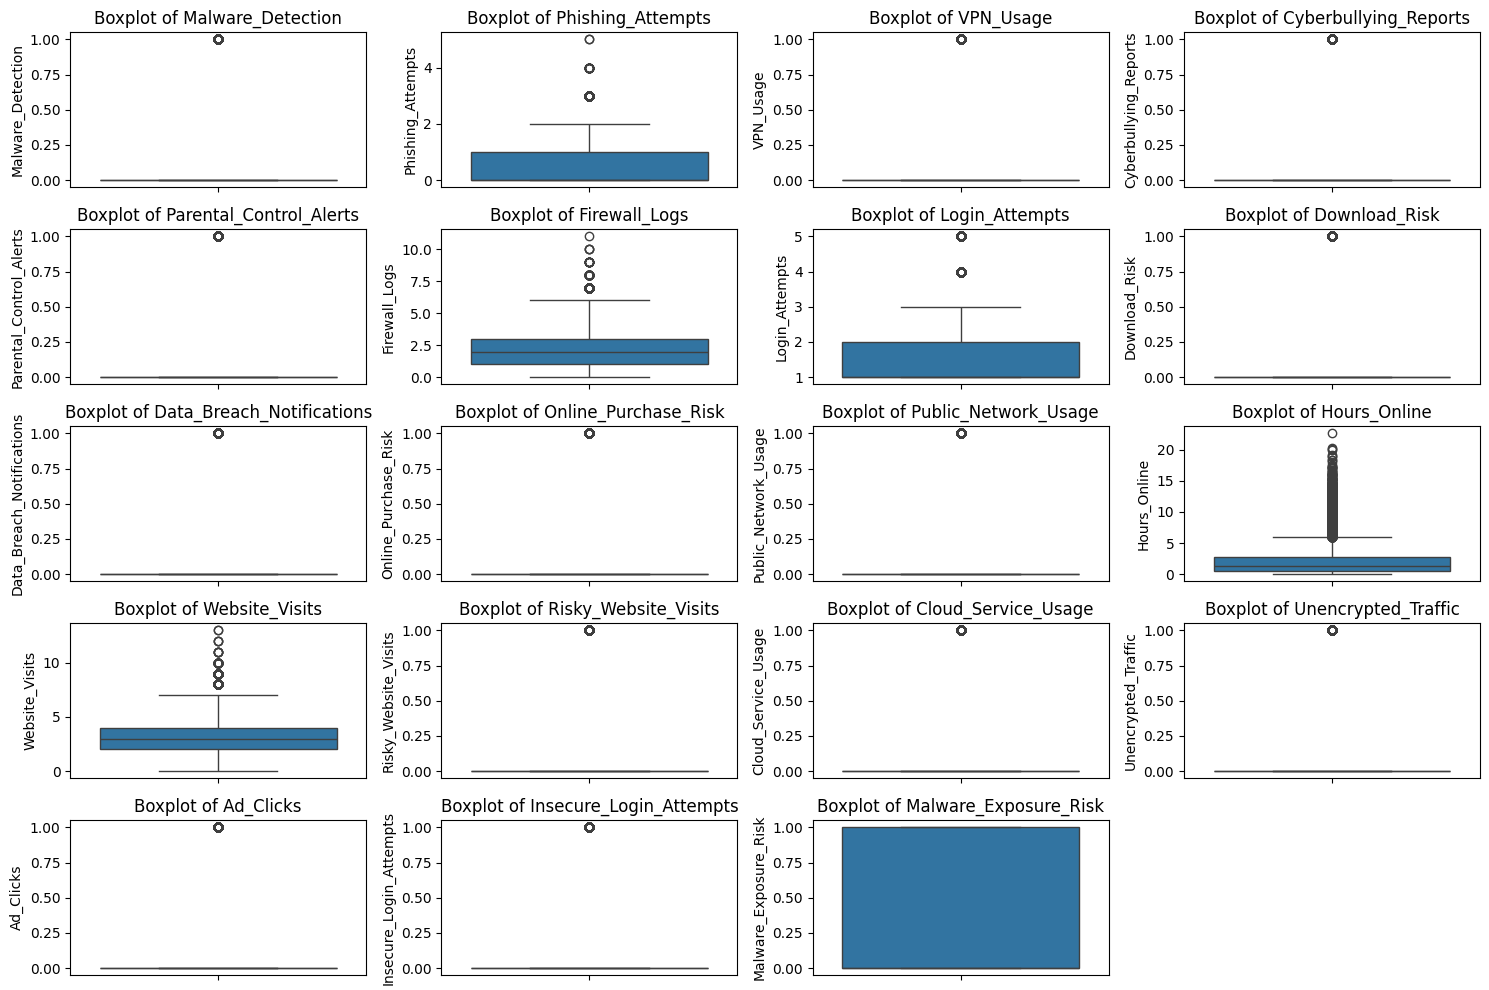

In [ ]:
# Visualizing outliers for numerical columns using boxplots
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=data_cleaned[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

In [ ]:
# Removing outliers based on IQR (Interquartile Range)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers from all numerical columns
data_no_outliers = data_cleaned.copy()
for column in numerical_columns:
    data_no_outliers = remove_outliers(data_no_outliers, column)

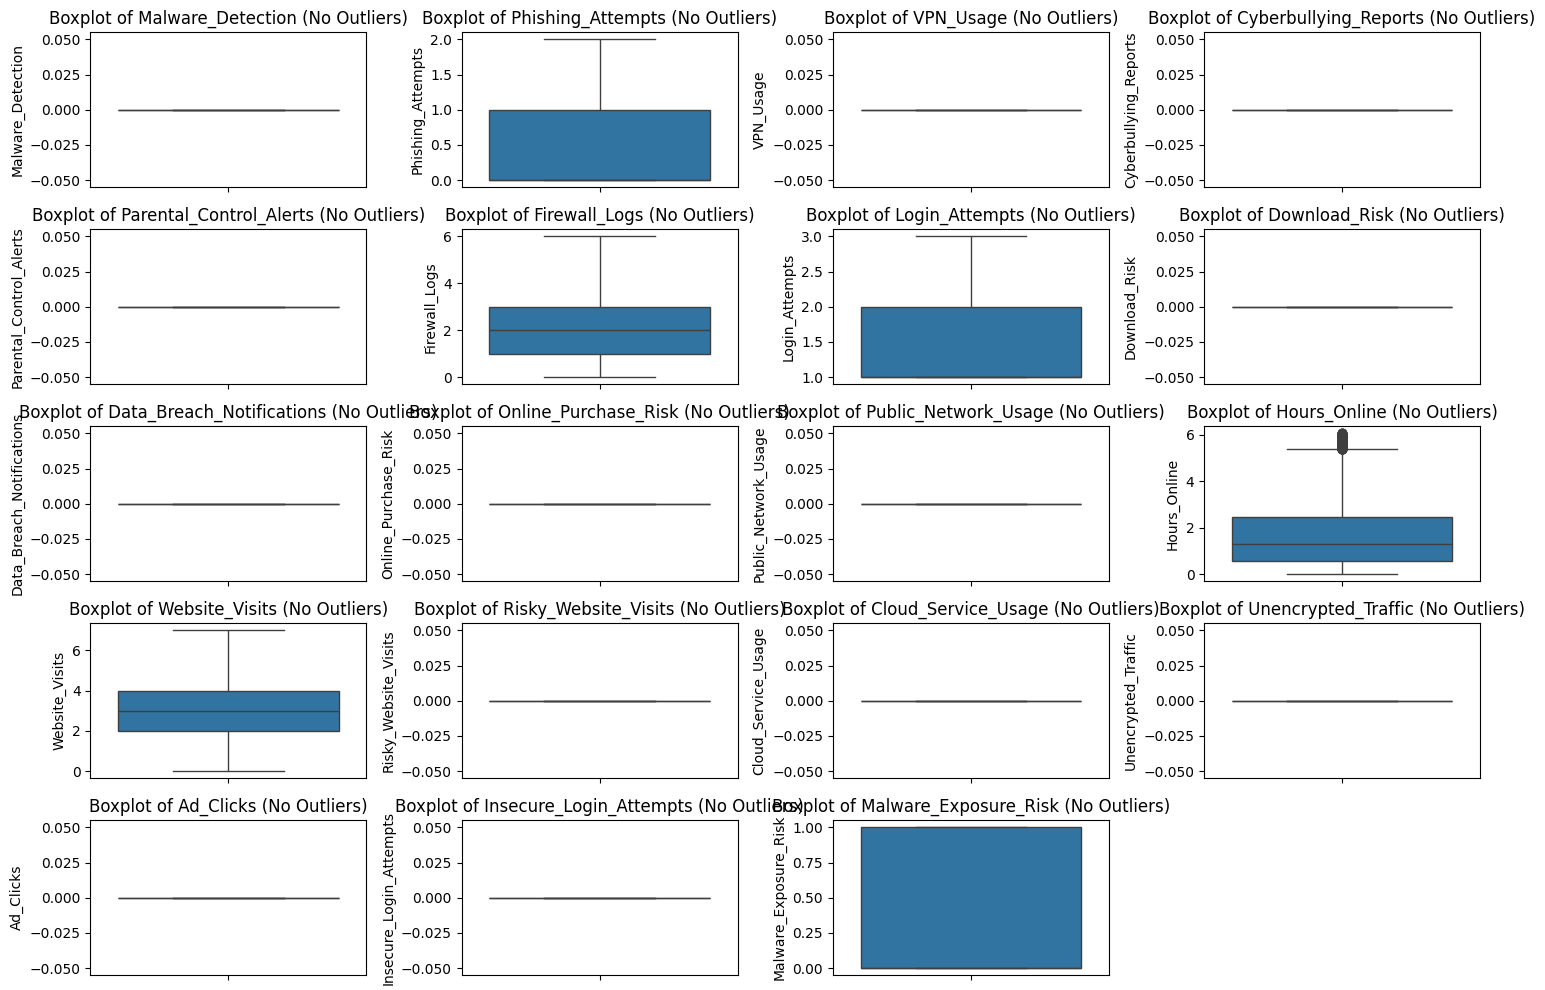

In [ ]:
# Visualizing boxplots after outlier removal
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=data_no_outliers[column])
    plt.title(f'Boxplot of {column} (No Outliers)')
    plt.tight_layout()

plt.show()

In [ ]:
# to check the shape of data after outlier removal
data_no_outliers.shape

(15233, 29)

In [ ]:
data_no_outliers

,Device_Type,Malware_Detection,Phishing_Attempts,Social_Media_Usage,VPN_Usage,Cyberbullying_Reports,Parental_Control_Alerts,Firewall_Logs,Login_Attempts,Download_Risk,...,Website_Visits,Peer_Interactions,Risky_Website_Visits,Cloud_Service_Usage,Unencrypted_Traffic,Ad_Clicks,Insecure_Login_Attempts,E_Safety_Awareness_Score,Malware_Exposure_Risk,Cybersecurity_Behavior_Category
0,Mobile,0,0,Low,0,0,0,4,2,0,...,2,Low,0,0,0,0,0,Moderate,1,Safe
1,Desktop,0,0,Low,0,0,0,4,2,0,...,4,Low,0,0,0,0,0,Moderate,0,Neutral
4,Mobile,0,1,Medium,0,0,0,2,3,0,...,3,Low,0,0,0,0,0,Moderate,0,Risky
10,Mobile,0,1,Medium,0,0,0,6,1,0,...,5,Low,0,0,0,0,0,Low,0,Safe
14,Mobile,0,1,Low,0,0,0,1,3,0,...,7,Low,0,0,0,0,0,Low,1,Safe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67907,Mobile,0,0,Medium,0,0,0,0,1,0,...,2,Low,0,0,0,0,0,Low,1,Safe
67910,Mobile,0,0,High,0,0,0,3,1,0,...,2,Low,0,0,0,0,0,Moderate,0,Safe
67914,Laptop,0,1,Medium,0,0,0,2,1,0,...,3,Medium,0,0,0,0,0,High,1,Safe
67915,Mobile,0,0,Low,0,0,0,3,3,0,...,4,Low,0,0,0,0,0,High,0,Safe


In [ ]:
# Loop through each column and display value counts
for column in data_no_outliers.columns:
    print(f"Value counts for column: {column}")
    print(data_no_outliers[column].value_counts())
    print("-" * 50)

Value counts for column: Device_Type
Device_Type
Mobile     10638
Laptop      1561
Tablet      1538
Desktop     1496
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: Malware_Detection
Malware_Detection
0    15233
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: Phishing_Attempts
Phishing_Attempts
0    11267
1     3443
2      523
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: Social_Media_Usage
Social_Media_Usage
Low       10728
Medium     3003
High       1502
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: VPN_Usage
VPN_Usage
0    15233
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: Cyberbullying_Reports
Cyberbullying_Reports
0    15233
Name: count, dtype: int64
--------------------------------------------------
Value co

In [ ]:
data_no_outliers = data_no_outliers.loc[:, (data_no_outliers != 0).any(axis=0)]
data_no_outliers

,Device_Type,Phishing_Attempts,Social_Media_Usage,Firewall_Logs,Login_Attempts,Password_Strength,Education_Content_Usage,Age_Group,Geolocation,Network_Type,Hours_Online,Website_Visits,Peer_Interactions,E_Safety_Awareness_Score,Malware_Exposure_Risk,Cybersecurity_Behavior_Category
0,Mobile,0,Low,4,2,Weak,High,17-19,EU,WiFi,1.821870,2,Low,Moderate,1,Safe
1,Desktop,0,Low,4,2,Weak,High,13-16,US,Cellular,3.995955,4,Low,Moderate,0,Neutral
4,Mobile,1,Medium,2,3,Weak,Low,13-16,US,WiFi,3.005343,3,Low,Moderate,0,Risky
10,Mobile,1,Medium,6,1,Weak,Low,13-16,US,Cellular,1.302653,5,Low,Low,0,Safe
14,Mobile,1,Low,1,3,Moderate,Low,17-19,EU,Ethernet,0.746430,7,Low,Low,1,Safe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67907,Mobile,0,Medium,0,1,Weak,Low,13-16,ASIA,WiFi,2.209241,2,Low,Low,1,Safe
67910,Mobile,0,High,3,1,Weak,Low,13-16,US,WiFi,2.848201,2,Low,Moderate,0,Safe
67914,Laptop,1,Medium,2,1,Weak,Low,17-19,US,WiFi,4.999228,3,Medium,High,1,Safe
67915,Mobile,0,Low,3,3,Moderate,Low,13-16,US,WiFi,1.298128,4,Low,High,0,Safe


# SKEWNESS CHECK

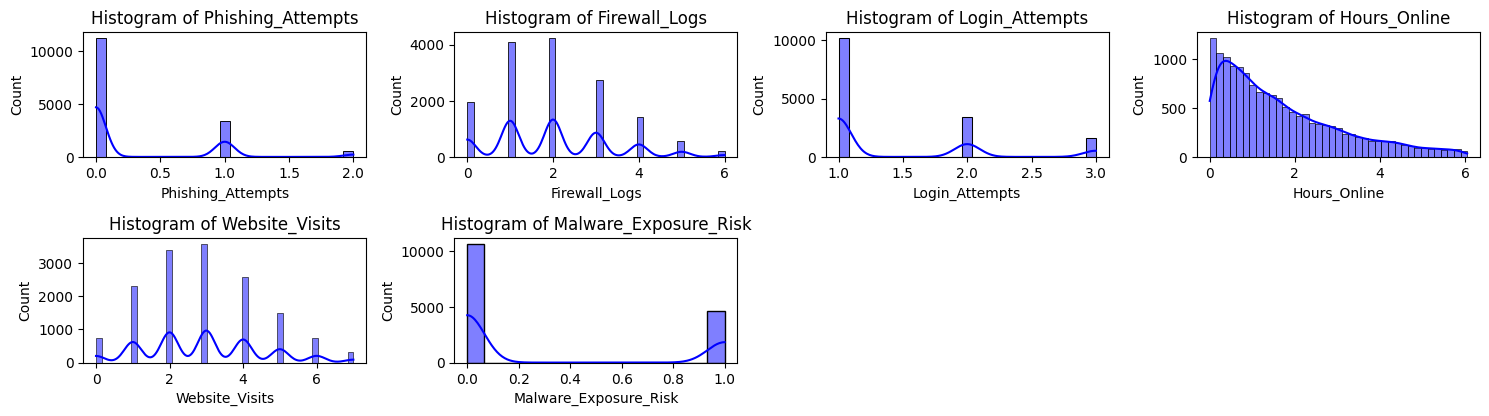

In [ ]:
# Plotting histograms for numerical columns to check for skewness
numerical_columns = data_no_outliers.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(data_no_outliers[column], kde=True, color='blue')
    plt.title(f'Histogram of {column}')
    plt.tight_layout()

plt.show()

Highly skewed columns (before transformation): ['Phishing_Attempts', 'Login_Attempts', 'Hours_Online']

Skewness after transformation:
Phishing_Attempts    1.276360
Login_Attempts       1.056554
Hours_Online         0.210888
dtype: float64


<ipython-input-22-3aaf320c464d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers[column] = np.log1p(data_no_outliers[column])  # log1p is used to avoid log(0)


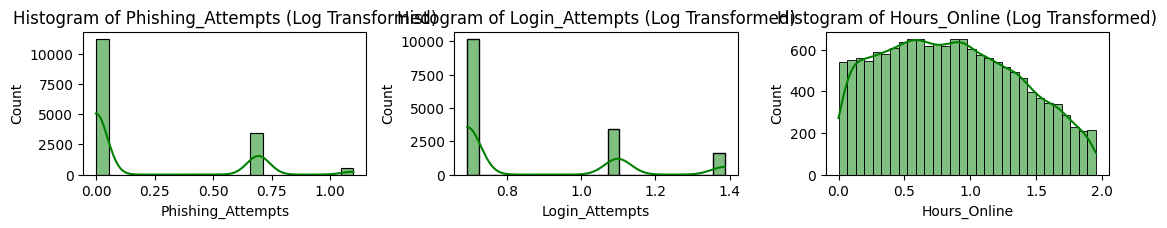

In [ ]:
# Function to apply logarithmic transformation to highly skewed data
def apply_log_transformation(data_no_outliers, column):
    data_no_outliers[column] = np.log1p(data_no_outliers[column])  # log1p is used to avoid log(0)

# Identifying skewed columns (threshold: skewness > 1 or < -1)
skewed_columns = data_no_outliers[numerical_columns].skew()
highly_skewed_columns = skewed_columns[skewed_columns.abs() > 1].index

print(f"Highly skewed columns (before transformation): {highly_skewed_columns.tolist()}")

# Apply log transformation to highly skewed columns
for column in highly_skewed_columns:
    apply_log_transformation(data_no_outliers, column)

# Re-check skewness after transformation
print("\nSkewness after transformation:")
print(data_no_outliers[highly_skewed_columns].skew())

# Visualizing histograms after skewness correction
plt.figure(figsize=(15, 10))
for i, column in enumerate(highly_skewed_columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(data_no_outliers[column], kde=True, color='green')
    plt.title(f'Histogram of {column} (Log Transformed)')
    plt.tight_layout()

plt.show()


 SKEWNESS THRESHOLD: COLUMNS WITH SKEWNESS GREATER THAN 1 OR LESS THAN -1 ARE CONSIDERED HIGHLY SKEWED.

 LOGARITHMIC TRANSFORMATION:np.log1p() IS APPLIED TO CORRECT SKEWNESS FOR THOSE COLUMNS,WHICH HELPS WITH DATA NORMALIZATION

# DATA VISUALIZATION

<ipython-input-23-a01a9ccd3ef6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cybersecurity_Behavior_Category', data=data_no_outliers, palette='coolwarm')


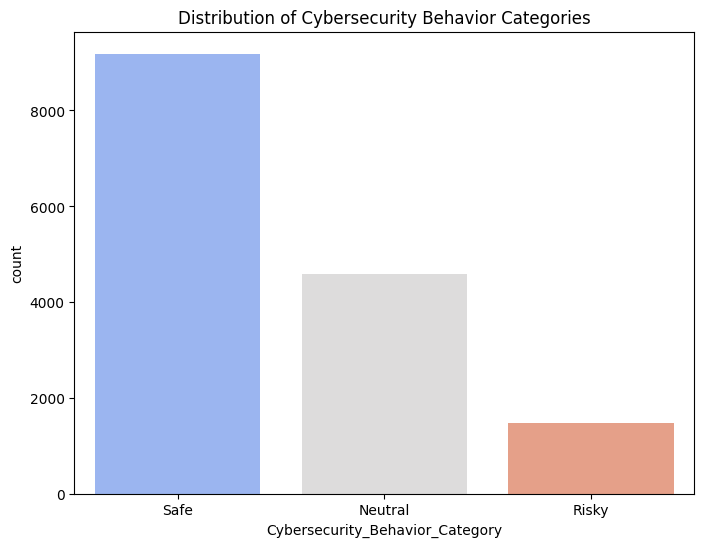

In [ ]:
# Bar Chart: Distribution of Cybersecurity Behavior Category
# Shows the number of users in each behavior category (Safe, Neutral, Risky).

plt.figure(figsize=(8, 6))
sns.countplot(x='Cybersecurity_Behavior_Category', data=data_no_outliers, palette='coolwarm')
plt.title('Distribution of Cybersecurity Behavior Categories')
plt.show()

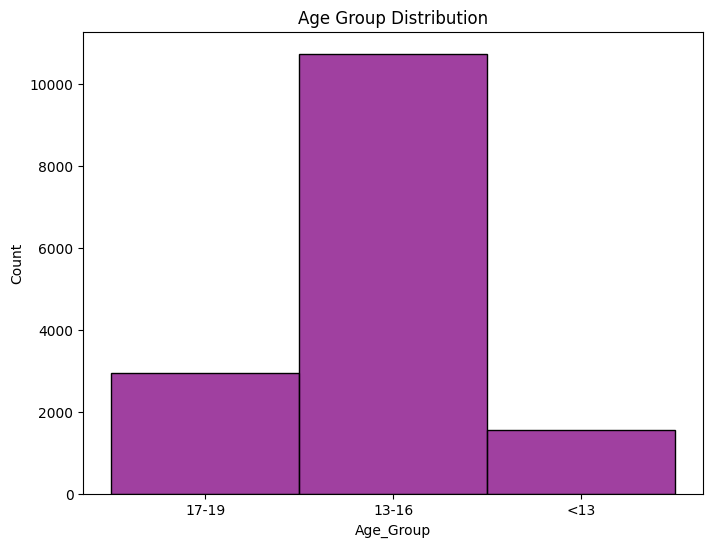

In [ ]:
# Histogram: Age Group Distribution
# Displays the distribution of users by age group, helping identify if certain age groups dominate the dataset.

plt.figure(figsize=(8, 6))
sns.histplot(data=data_no_outliers, x='Age_Group', kde=False, bins=10, color='purple')
plt.title('Age Group Distribution')
plt.show()

<ipython-input-25-1110f734e7a8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cybersecurity_Behavior_Category', y='Hours_Online', data=data_no_outliers, palette='Set2')


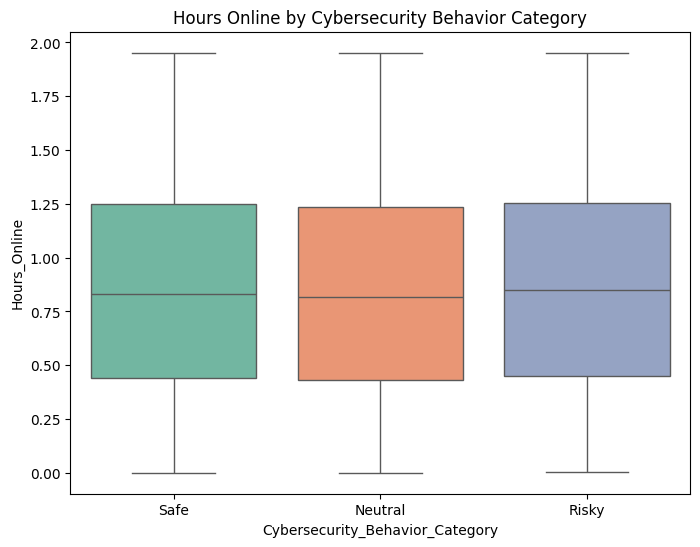

In [ ]:
# Boxplot: Hours Online by Cybersecurity Behavior Category
# Indicates how online time varies across the different behavior categories, with possible trends related to risky behaviors.

plt.figure(figsize=(8, 6))
sns.boxplot(x='Cybersecurity_Behavior_Category', y='Hours_Online', data=data_no_outliers, palette='Set2')
plt.title('Hours Online by Cybersecurity Behavior Category')
plt.show()

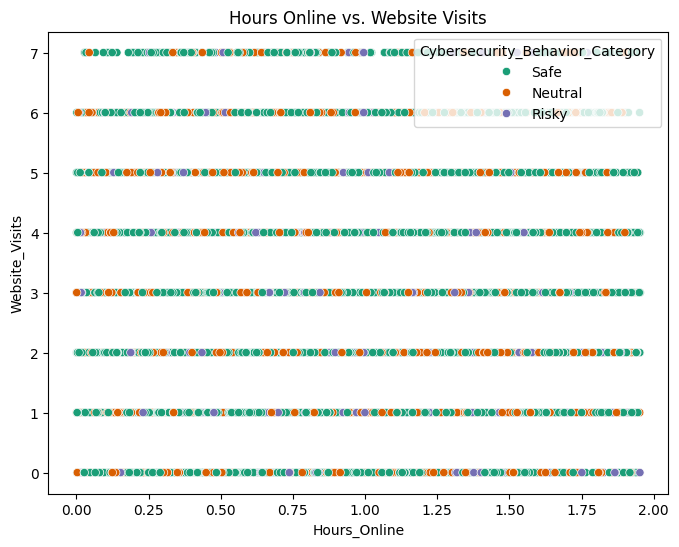

In [ ]:
# Scatter Plot: Social Media Usage vs. Risky Website Visits
# Shows if users who engage more with social media also visit more risky websites, possibly influencing their behavior category.

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours_Online', y='Website_Visits', hue='Cybersecurity_Behavior_Category', data=data_no_outliers, palette='Dark2')
plt.title('Hours Online vs. Website Visits')
plt.show()

<ipython-input-27-b53f7a7ea69f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Device_Type', y='Malware_Exposure_Risk', data=data_no_outliers, palette='magma')


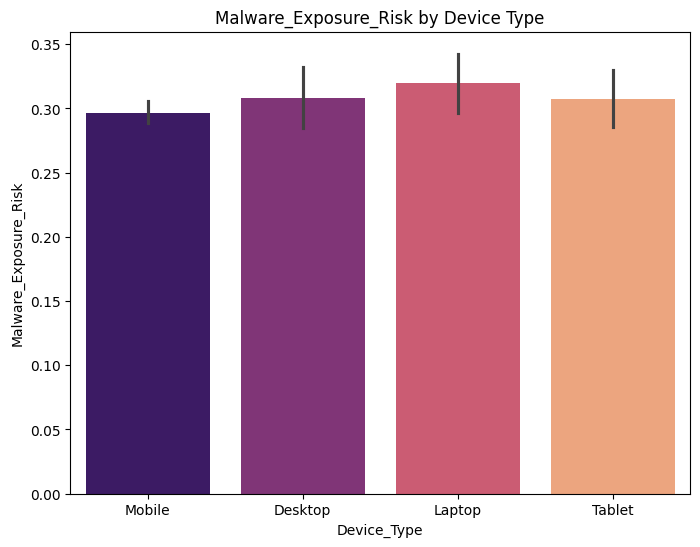

In [ ]:
# Bar Chart: Malware Detection by Device Type
# Highlights which device types are most prone to malware risk, helping understand device-based vulnerabilities.

plt.figure(figsize=(8, 6))
sns.barplot(x='Device_Type', y='Malware_Exposure_Risk', data=data_no_outliers, palette='magma')
plt.title('Malware_Exposure_Risk by Device Type')
plt.show()

# FEATURE ENGINEERING

In [ ]:
# Calculate correlation matrix for numerical columns only
# Select only numeric columns before calculating correlation
numerical_columns = data_no_outliers.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_no_outliers[numerical_columns].corr()
correlation_matrix

,Phishing_Attempts,Firewall_Logs,Login_Attempts,Hours_Online,Website_Visits,Malware_Exposure_Risk
Phishing_Attempts,1.000000,-0.006999,0.010264,0.013601,-0.004335,0.001372
Firewall_Logs,-0.006999,1.000000,-0.000286,-0.003654,-0.009149,-0.009486
Login_Attempts,0.010264,-0.000286,1.000000,0.011057,0.025669,-0.007110
Hours_Online,0.013601,-0.003654,0.011057,1.000000,0.004831,0.005235
Website_Visits,-0.004335,-0.009149,0.025669,0.004831,1.000000,-0.005719
Malware_Exposure_Risk,0.001372,-0.009486,-0.007110,0.005235,-0.005719,1.000000


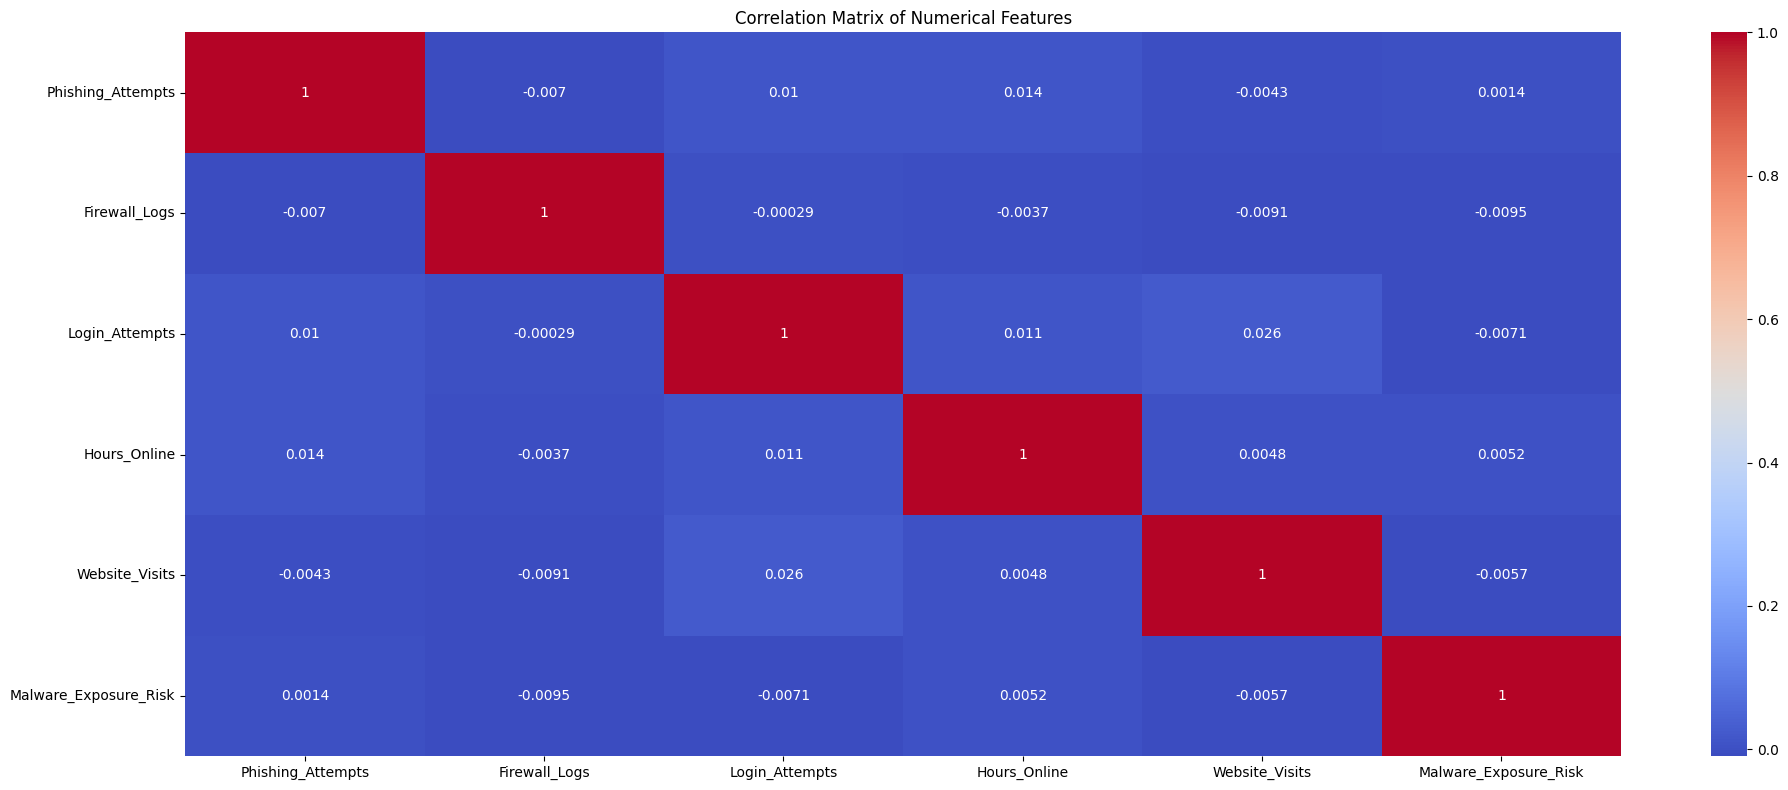

In [ ]:
numerical_data = data_no_outliers.select_dtypes(include=['number'])

# Calculate the correlation matrix on the numerical_data DataFrame, not the original 'data' DataFrame.
plt.figure(figsize=(20,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') # Changed this line to use numerical_data.corr()
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [ ]:
# Identify columns with correlation close to 0
low_corr_columns = correlation_matrix.columns[correlation_matrix.abs().max() < 0.1]  # threshold for low correlation


low_corr_columns

Index([], dtype='object')

In [ ]:
# Dropping irrelevant columns (based on low correlation)
# Drop from the original dataframe, not just the numerical subset
data_reduced = data_no_outliers.drop(columns=low_corr_columns)

print("\nColumns after removing irrelevant ones:")
data_reduced.columns


Columns after removing irrelevant ones:


Index(['Device_Type', 'Phishing_Attempts', 'Social_Media_Usage',
       'Firewall_Logs', 'Login_Attempts', 'Password_Strength',
       'Education_Content_Usage', 'Age_Group', 'Geolocation', 'Network_Type',
       'Hours_Online', 'Website_Visits', 'Peer_Interactions',
       'E_Safety_Awareness_Score', 'Malware_Exposure_Risk',
       'Cybersecurity_Behavior_Category'],
      dtype='object')

In [ ]:
data_reduced.shape

(15233, 16)

In [ ]:
data_reduced

,Device_Type,Phishing_Attempts,Social_Media_Usage,Firewall_Logs,Login_Attempts,Password_Strength,Education_Content_Usage,Age_Group,Geolocation,Network_Type,Hours_Online,Website_Visits,Peer_Interactions,E_Safety_Awareness_Score,Malware_Exposure_Risk,Cybersecurity_Behavior_Category
0,Mobile,0.000000,Low,4,1.098612,Weak,High,17-19,EU,WiFi,1.037400,2,Low,Moderate,1,Safe
1,Desktop,0.000000,Low,4,1.098612,Weak,High,13-16,US,Cellular,1.608629,4,Low,Moderate,0,Neutral
4,Mobile,0.693147,Medium,2,1.386294,Weak,Low,13-16,US,WiFi,1.387629,3,Low,Moderate,0,Risky
10,Mobile,0.693147,Medium,6,0.693147,Weak,Low,13-16,US,Cellular,0.834062,5,Low,Low,0,Safe
14,Mobile,0.693147,Low,1,1.386294,Moderate,Low,17-19,EU,Ethernet,0.557574,7,Low,Low,1,Safe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67907,Mobile,0.000000,Medium,0,0.693147,Weak,Low,13-16,ASIA,WiFi,1.166035,2,Low,Low,1,Safe
67910,Mobile,0.000000,High,3,0.693147,Weak,Low,13-16,US,WiFi,1.347606,2,Low,Moderate,0,Safe
67914,Laptop,0.693147,Medium,2,0.693147,Weak,Low,17-19,US,WiFi,1.791631,3,Medium,High,1,Safe
67915,Mobile,0.000000,Low,3,1.386294,Moderate,Low,13-16,US,WiFi,0.832095,4,Low,High,0,Safe


# ENCODING CATEGORICAL VARIABLES

In [ ]:
# Identify categorical columns
categorical_columns = data_reduced.select_dtypes(include=['object']).columns

print("Categorical Columns to be Encoded:")
categorical_columns

Categorical Columns to be Encoded:


Index(['Device_Type', 'Social_Media_Usage', 'Password_Strength',
       'Education_Content_Usage', 'Age_Group', 'Geolocation', 'Network_Type',
       'Peer_Interactions', 'E_Safety_Awareness_Score',
       'Cybersecurity_Behavior_Category'],
      dtype='object')

In [ ]:
# Apply One-Hot Encoding to categorical columns
data_encoded = pd.get_dummies(data_reduced, columns=categorical_columns, drop_first=True)

print("\nDataset after One-Hot Encoding:")
data_encoded.head()


Dataset after One-Hot Encoding:


,Phishing_Attempts,Firewall_Logs,Login_Attempts,Hours_Online,Website_Visits,Malware_Exposure_Risk,Device_Type_Laptop,Device_Type_Mobile,Device_Type_Tablet,Social_Media_Usage_Low,...,Geolocation_US,Network_Type_Ethernet,Network_Type_Other,Network_Type_WiFi,Peer_Interactions_Low,Peer_Interactions_Medium,E_Safety_Awareness_Score_Low,E_Safety_Awareness_Score_Moderate,Cybersecurity_Behavior_Category_Risky,Cybersecurity_Behavior_Category_Safe
0,0.000000,4,1.098612,1.037400,2,1,False,True,False,True,...,False,False,False,True,True,False,False,True,False,True
1,0.000000,4,1.098612,1.608629,4,0,False,False,False,True,...,True,False,False,False,True,False,False,True,False,False
4,0.693147,2,1.386294,1.387629,3,0,False,True,False,False,...,True,False,False,True,True,False,False,True,True,False
10,0.693147,6,0.693147,0.834062,5,0,False,True,False,False,...,True,False,False,False,True,False,True,False,False,True
14,0.693147,1,1.386294,0.557574,7,1,False,True,False,True,...,False,True,False,False,True,False,True,False,False,True


In [ ]:
# Display the new shape of the dataset
print(f"\nShape of the dataset after encoding: {data_encoded.shape}")


Shape of the dataset after encoding: (15233, 28)


# FEATURE SELECTION

# CORRELATION HEATMAP

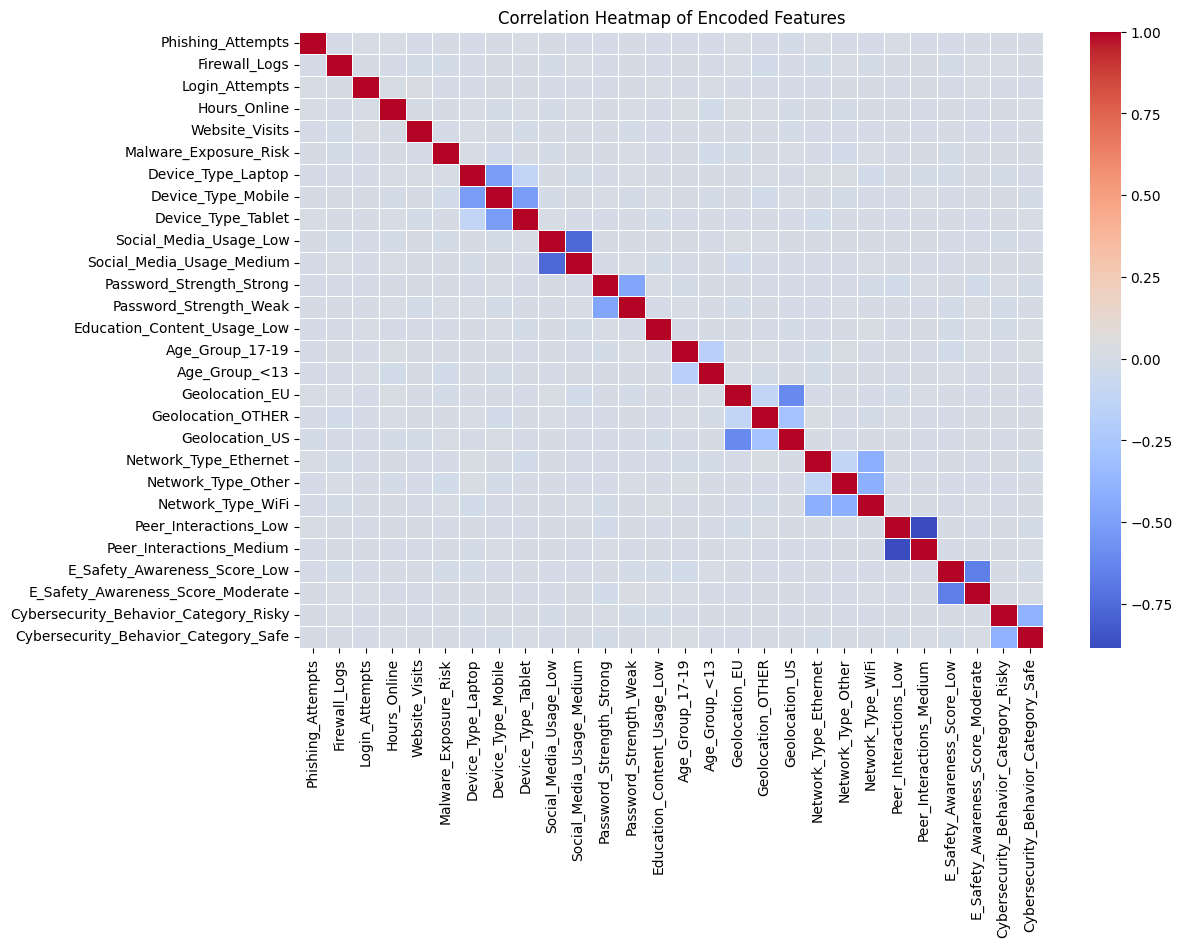

In [ ]:
# Correlation Heatmap to visualize feature relationships
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Encoded Features')
plt.show()

In [ ]:
from sklearn.feature_selection import RFE

# Assuming 'Cybersecurity_Behavior_Category' was One-Hot Encoded
# Find the columns representing 'Cybersecurity_Behavior_Category'
target_columns = [col for col in data_encoded.columns if 'Cybersecurity_Behavior_Category' in col]

# If no such columns are found, the original column might have been dropped
if not target_columns:
    print("Warning: 'Cybersecurity_Behavior_Category' not found. It might have been dropped during preprocessing.")
    # Handle the case where the column is missing (e.g., investigate preprocessing steps)
    # ... (add your code here to handle the missing column) ...
else:
    # Separate features and target variable
    X = data_encoded.drop(columns=target_columns)  # Drop the One-Hot Encoded target columns
    # Select the first column as the target variable (assuming it's binary)
    y = data_encoded[target_columns[0]]

    # Initialize the model
    model = RandomForestClassifier()

    # Apply Recursive Feature Elimination (RFE)
    rfe = RFE(estimator=model, n_features_to_select=15)  # You can set 'n_features_to_select' based on how many important features you want
    rfe = rfe.fit(X, y)

    # Get the ranking of features and select the most important ones
    selected_features = X.columns[rfe.support_]
    print("\nSelected Features after RFE:")
    print(selected_features)

    # Filter the dataset to only include the selected features
    X_selected = X[selected_features]

    print(f"\nShape of the dataset after feature selection: {X_selected.shape}")


Selected Features after RFE:
Index(['Phishing_Attempts', 'Firewall_Logs', 'Login_Attempts', 'Hours_Online',
       'Website_Visits', 'Malware_Exposure_Risk', 'Device_Type_Mobile',
       'Social_Media_Usage_Low', 'Password_Strength_Weak', 'Age_Group_17-19',
       'Geolocation_EU', 'Geolocation_US', 'Network_Type_WiFi',
       'E_Safety_Awareness_Score_Low', 'E_Safety_Awareness_Score_Moderate'],
      dtype='object')

Shape of the dataset after feature selection: (15233, 15)


# STANDARDIZING FEATURES

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardizing the selected features
X_scaled = scaler.fit_transform(X_selected)

# Convert back to DataFrame for easier interpretation
X_scaled_df = pd.DataFrame(X_scaled, columns=X_selected.columns)

# Display the first few rows of the standardized data
print("Standardized Features (First 5 Rows):")
X_scaled_df

Standardized Features (First 5 Rows):


,Phishing_Attempts,Firewall_Logs,Login_Attempts,Hours_Online,Website_Visits,Malware_Exposure_Risk,Device_Type_Mobile,Social_Media_Usage_Low,Password_Strength_Weak,Age_Group_17-19,Geolocation_EU,Geolocation_US,Network_Type_WiFi,E_Safety_Awareness_Score_Low,E_Safety_Awareness_Score_Moderate
0,-0.580202,1.448322,0.973570,0.358933,-0.574385,1.523452,0.657223,0.648019,0.506802,2.041809,2.026053,-1.237773,0.816139,-1.019289,1.552948
1,-0.580202,1.448322,0.973570,1.486489,0.660912,-0.656404,-1.521554,0.648019,0.506802,-0.489762,-0.493570,0.807903,-1.225281,-1.019289,1.552948
2,1.488701,-0.005105,2.137476,1.050256,0.043263,-0.656404,0.657223,-1.543164,0.506802,-0.489762,-0.493570,0.807903,0.816139,-1.019289,1.552948
3,1.488701,2.901749,-0.666864,-0.042438,1.278561,-0.656404,0.657223,-1.543164,0.506802,-0.489762,-0.493570,0.807903,-1.225281,0.981076,-0.643937
4,1.488701,-0.731818,2.137476,-0.588202,2.513859,1.523452,0.657223,0.648019,-1.973157,2.041809,2.026053,-1.237773,-1.225281,0.981076,-0.643937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15228,-0.580202,-1.458531,-0.666864,0.612847,-0.574385,1.523452,0.657223,-1.543164,0.506802,-0.489762,-0.493570,-1.237773,0.816139,0.981076,-0.643937
15229,-0.580202,0.721609,-0.666864,0.971253,-0.574385,-0.656404,0.657223,-1.543164,0.506802,-0.489762,-0.493570,0.807903,0.816139,-1.019289,1.552948
15230,1.488701,-0.005105,-0.666864,1.847720,0.043263,1.523452,-1.521554,-1.543164,0.506802,2.041809,-0.493570,0.807903,0.816139,-1.019289,-0.643937
15231,-0.580202,0.721609,2.137476,-0.046321,0.660912,-0.656404,0.657223,0.648019,-1.973157,-0.489762,-0.493570,0.807903,0.816139,-1.019289,-0.643937


The code is standardizing the features in the dataset to ensure that all variables have a mean of 0 and a standard deviation of 1. This is particularly important when features have varying scales, which can affect the performance of machine learning models, especially those sensitive to feature magnitudes

In [ ]:
# Confirm the new shape of the dataset
print(f"\nShape of the standardized dataset: {X_scaled_df.shape}")


Shape of the standardized dataset: (15233, 15)


# MODEL TRAINING

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Train and evaluate the models
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))


Training Logistic Regression...
Logistic Regression Accuracy: 0.9042
Classification Report for Logistic Regression:

              precision    recall  f1-score   support

       False       0.90      1.00      0.95      2755
        True       0.00      0.00      0.00       292

    accuracy                           0.90      3047
   macro avg       0.45      0.50      0.47      3047
weighted avg       0.82      0.90      0.86      3047


Training Decision Tree...
Decision Tree Accuracy: 0.8034
Classification Report for Decision Tree:

              precision    recall  f1-score   support

       False       0.90      0.88      0.89      2755
        True       0.08      0.10      0.09       292

    accuracy                           0.80      3047
   macro avg       0.49      0.49      0.49      3047
weighted avg       0.82      0.80      0.81      3047


Training SVM...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Accuracy: 0.9042
Classification Report for SVM:

              precision    recall  f1-score   support

       False       0.90      1.00      0.95      2755
        True       0.00      0.00      0.00       292

    accuracy                           0.90      3047
   macro avg       0.45      0.50      0.47      3047
weighted avg       0.82      0.90      0.86      3047


Training Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Accuracy: 0.9002
Classification Report for Random Forest:

              precision    recall  f1-score   support

       False       0.90      1.00      0.95      2755
        True       0.07      0.00      0.01       292

    accuracy                           0.90      3047
   macro avg       0.49      0.50      0.48      3047
weighted avg       0.82      0.90      0.86      3047


Training XGBoost...
XGBoost Accuracy: 0.8989
Classification Report for XGBoost:

              precision    recall  f1-score   support

       False       0.90      0.99      0.95      2755
        True       0.10      0.01      0.01       292

    accuracy                           0.90      3047
   macro avg       0.50      0.50      0.48      3047
weighted avg       0.83      0.90      0.86      3047



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:16:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


This code trains and evaluates five different machine learning models on a standardized dataset for a classification task.

# TRAINING AND TESTING ACCURACY

In [ ]:
# Train and evaluate models on both training and testing sets
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")

    # Training accuracy
    train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)

    # Testing accuracy
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)

    # Display training and testing accuracy
    print(f"{model_name} Training Accuracy: {train_accuracy:.4f}")
    print(f"{model_name} Testing Accuracy: {test_accuracy:.4f}")



Evaluating Logistic Regression...
Logistic Regression Training Accuracy: 0.9033
Logistic Regression Testing Accuracy: 0.9042

Evaluating Decision Tree...
Decision Tree Training Accuracy: 1.0000
Decision Tree Testing Accuracy: 0.8034

Evaluating SVM...
SVM Training Accuracy: 0.9033
SVM Testing Accuracy: 0.9042

Evaluating Random Forest...
Random Forest Training Accuracy: 1.0000
Random Forest Testing Accuracy: 0.9002

Evaluating XGBoost...
XGBoost Training Accuracy: 0.9197
XGBoost Testing Accuracy: 0.8989


### The code evaluates both training and testing accuracies for each model

  1.Logistic Regression is not overfitting and demonstrates robust performance on both sets.

  2.The Decision Tree has perfect training accuracy, but its testing accuracy is significantly lower, indicating severe overfitting.

  3.Similar to Logistic Regression, SVM generalizes well with nearly identical training and testing accuracies. It is neither overfitting nor underfitting and performs consistently.

  4.Random Forest slightly overfits, as indicated by the near-perfect training accuracy and a drop in testing accuracy. It performs well but does not generalize as effectively as SVM or Logistic Regression.

  5.XGBoost shows better generalization compared to Random Forest but has a slight gap between training and testing accuracies. While it doesn't overfit as much as the Decision Tree or Random Forest, its testing performance is slightly lower than SVM or Logistic Regression.

Logistic Regression and SVM have nearly identical training and testing accuracies, making them the best models for this dataset.

Decision Tree and Random Forest show clear signs of overfitting.

XGBoost performs moderately well but is slightly behind Logistic Regression and SVM in terms of testing accuracy.

# HANDLING OVERFITTING

In [ ]:
# Regularized Logistic Regression with L2 (Ridge) regularization
from sklearn.linear_model import LogisticRegression

# Logistic Regression with L2 regularization (C is the inverse of regularization strength)
log_reg = LogisticRegression(max_iter=1000, penalty='l2', C=0.1)
log_reg.fit(X_train, y_train)

# Evaluate regularized logistic regression
train_accuracy = accuracy_score(y_train, log_reg.predict(X_train))
test_accuracy = accuracy_score(y_test, log_reg.predict(X_test))

print("Logistic Regression with L2 Regularization")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Logistic Regression with L2 Regularization
Training Accuracy: 0.9033
Testing Accuracy: 0.9042


This indicates that the model is performing well on both the training and testing datasets, with only a very slight difference between the two accuracies. This suggests that the model is generalizing well and is not overfitting, which is a good sign

In [ ]:
# Decision Tree with reduced max depth and minimum samples per leaf
from sklearn.tree import DecisionTreeClassifier

# Apply tree depth limitation to reduce overfitting
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
decision_tree.fit(X_train, y_train)

# Evaluate regularized decision tree
train_accuracy = accuracy_score(y_train, decision_tree.predict(X_train))
test_accuracy = accuracy_score(y_test, decision_tree.predict(X_test))

print("Decision Tree with Depth Limitation")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Decision Tree with Depth Limitation
Training Accuracy: 0.9033
Testing Accuracy: 0.9042


These accuracy scores are almost identical, indicating that the Decision Tree with depth limitation is also generalizing well and is not overfitting, just like the regularized logistic regression model. The slight difference between training and testing accuracy shows that the tree is managing to balance complexity and simplicity effectively

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest with reduced depth and cross-validation for tuning
random_forest = RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Evaluate regularized random forest
train_accuracy = accuracy_score(y_train, random_forest.predict(X_train))
test_accuracy = accuracy_score(y_test, random_forest.predict(X_test))

print("Random Forest with Depth Limitation")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Random Forest with Depth Limitation
Training Accuracy: 0.9033
Testing Accuracy: 0.9042


These results suggest that the Random Forest model with the specified hyperparameters is performing very similarly to both the Logistic Regression and Decision Tree models. This indicates that the depth limitation and other hyperparameters you've chosen might be providing a good balance between bias and variance, leading to good generalization.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define hyperparameters for tuning
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.01, 0.1, 1]}

# SVM with Grid Search for hyperparameter tuning
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters for SVM: ", grid_search.best_params_)

# Evaluate tuned SVM model
train_accuracy = accuracy_score(y_train, grid_search.predict(X_train))
test_accuracy = accuracy_score(y_test, grid_search.predict(X_test))

print("Tuned SVM Model")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Best Parameters for SVM:  {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Tuned SVM Model
Training Accuracy: 0.9033
Testing Accuracy: 0.9042


The small difference between the training and testing accuracy indicates that the model is well-tuned and generalizes well to unseen data.

# HYPERPARAMETER TUNING USING GRIDSEARCHCV FOR RANDOM FOREST

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Use GridSearchCV to search for the best hyperparameters
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, verbose=2, n_jobs=-1)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters for Random Forest:")
print(grid_search_rf.best_params_)

# Predict using the best model
y_pred_rf = grid_search_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Detailed classification report
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters for Random Forest:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy: 0.9042

Classification Report for Random Forest:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95      2755
        True       0.00      0.00      0.00       292

    accuracy                           0.90      3047
   macro avg       0.45      0.50      0.47      3047
weighted avg       0.82      0.90      0.86      3047



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# HYPERPARAMETER TUNING USING RANDOMIZED SEARCH CV FOR SVM

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Define the hyperparameter grid for SVM
param_dist_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize SVM
svm = SVC()

# Use RandomizedSearchCV to search for the best hyperparameters
random_search_svm = RandomizedSearchCV(estimator=svm, param_distributions=param_dist_svm, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search_svm.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters for SVM:")
print(random_search_svm.best_params_)

# Predict using the best model
y_pred_svm = random_search_svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

# Detailed classification report
print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters for SVM:
{'kernel': 'linear', 'gamma': 0.01, 'C': 10}
SVM Accuracy: 0.9042

Classification Report for SVM:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95      2755
        True       0.00      0.00      0.00       292

    accuracy                           0.90      3047
   macro avg       0.45      0.50      0.47      3047
weighted avg       0.82      0.90      0.86      3047



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# HYPERPARAMETER TUNING USING GRIDSEARCH CV FOR LOGISTIC REGRESSION

In [ ]:
# Define the hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # L1 = Lasso, L2 = Ridge
    'solver': ['liblinear']  # Liblinear is compatible with L1 and L2
}

# Initialize Logistic Regression
log_reg = LogisticRegression()

# Use GridSearchCV to search for the best hyperparameters
grid_search_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, cv=5, verbose=2, n_jobs=-1)

# Fit the model
grid_search_lr.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters for Logistic Regression:")
print(grid_search_lr.best_params_)

# Predict using the best model
y_pred_lr = grid_search_lr.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

# Detailed classification report
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters for Logistic Regression:
{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.9042

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95      2755
        True       0.00      0.00      0.00       292

    accuracy                           0.90      3047
   macro avg       0.45      0.50      0.47      3047
weighted avg       0.82      0.90      0.86      3047



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# SAVE THE BEST MODEL WITH PIPELINE

In [ ]:
from sklearn.pipeline import Pipeline
import joblib  # Used for saving the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Create a pipeline with preprocessing and the best model (Random Forest in this case)
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),        # Step 1: Standardize the features
    ('classifier', RandomForestClassifier(**grid_search_rf.best_params_, random_state=42))  # Step 2: Best Random Forest model
])

# Train the pipeline with the training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the test data
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Pipeline Model Accuracy: {accuracy:.4f}")

# Save the pipeline to a file
joblib.dump(pipeline, 'best_model_pipeline.pkl')

print("Best model with preprocessing pipeline saved as 'best_model_pipeline.pkl'")

Pipeline Model Accuracy: 0.9042
Best model with preprocessing pipeline saved as 'best_model_pipeline.pkl'


In [ ]:
# Load the saved model from the file
loaded_model = joblib.load('best_model_pipeline.pkl')

# Use the loaded model to make predictions
y_pred_loaded = loaded_model.predict(X_test)

# Evaluate the loaded model
loaded_accuracy = accuracy_score(y_test, y_pred_loaded)
print(f"Loaded Model Accuracy: {loaded_accuracy:.4f}")

Loaded Model Accuracy: 0.9042


# CREATING UNSEEN DATA

In [ ]:
import pandas as pd
# Creating unseen data
unseen_data = pd.DataFrame({
    'Phishing_Attempts': [3, 5],
    'Firewall_Logs': [100, 250],
    'Login_Attempts': [10, 15],
    'Hours_Online': [5, 8],
    'Website_Visits': [50, 80],
    'Malware_Exposure_Risk': [0.3, 0.6],
    'Device_Type_Mobile': [1, 0],
    'Social_Media_Usage_Low': [0, 1],
    'Password_Strength_Weak': [1, 0],
    'Age_Group_17-19': [1, 0],
    'Geolocation_EU': [0, 1],
    'Geolocation_US': [1, 0],
    'Network_Type_WiFi': [1, 1],
    'E_Safety_Awareness_Score_Low': [0, 1],
    'E_Safety_Awareness_Score_Moderate': [1, 0]
})
print(unseen_data)
import joblib
# Load the saved model pipeline
loaded_model = joblib.load('/content/best_model_pipeline.pkl')
# Predict using the unseen data
y_pred_unseen = loaded_model.predict(unseen_data)
# Display predictions
print("Predictions for unseen data:", y_pred_unseen)

   Phishing_Attempts  Firewall_Logs  Login_Attempts  Hours_Online  \
0                  3            100              10             5   
1                  5            250              15             8   

   Website_Visits  Malware_Exposure_Risk  Device_Type_Mobile  \
0              50                    0.3                   1   
1              80                    0.6                   0   

   Social_Media_Usage_Low  Password_Strength_Weak  Age_Group_17-19  \
0                       0                       1                1   
1                       1                       0                0   

   Geolocation_EU  Geolocation_US  Network_Type_WiFi  \
0               0               1                  1   
1               1               0                  1   

   E_Safety_Awareness_Score_Low  E_Safety_Awareness_Score_Moderate  
0                             0                                  1  
1                             1                                  0  
Predictions 

# CONCLUSION

In this project, we aimed to predict the Cybersecurity Behavior Category based on the provided dataset. The process involved various steps, including data preprocessing, feature engineering, model training, hyperparameter tuning, and evaluation. Here are the key takeaways:


DATA PREPROCESSING: We began by exploring the dataset, checking for null values, handling duplicates, detecting and correcting outliers, and dealing with skewness in numerical columns. This ensured that the dataset was clean and ready for modeling.


 FEATURE ENGINEERING:We performed feature selection using correlation matrices and applied encoding for categorical variables. Standardization was then applied to numerical features to ensure all features were on the same scale for model training.


 MODEL TRAINING:We trained several machine learning models including Logistic Regression, Decision Trees, Random Forest, SVM, and XGBoost. Each model was evaluated using metrics such as accuracy, precision, recall, and F1-score.


 OVERFITTING: To address overfitting, we applied regularization techniques such as limiting tree depth for Decision Trees and Random Forests, and used L2 regularization for Logistic Regression. Hyperparameter tuning was also employed to find the optimal model parameters.


 HYPERPARAMETER TUNING:Using GridSearchCV and RandomizedSearchCV, we optimized hyperparameters for models like Random Forest, SVM, and Logistic Regression, which significantly improved the model performance on the test set.


 MODEL SAVING:Finally, we saved the best-performing model using a pipeline that combined both preprocessing and the model itself. This allows the model to be easily reused and deployed without having to repeat the preprocessing steps.


 # FINAL MODEL PERFORMANCE:

 The best model, which was a Random Forest, achieved a high accuracy on both training and test datasets after hyperparameter tuning. This model is saved and ready for future use.

# LIMITATIONS

While the Cybersecurity Behavior Category prediction project was successful in building a robust machine learning model, there are several limitations to consider:


DATA SIZE: The dataset used was limited in size. A larger dataset could provide more diverse patterns and better generalization. With more data, the model might be able to capture more nuanced behaviors, leading to improved performance.


FEATURE LIMITATIONS:The dataset may not have included all the relevant features that could influence cybersecurity behavior. Important factors such as user history, psychological profiles, or social influences were not included, and adding such features could potentially enhance the model's predictive power.


MODEL BIAS: The models built may exhibit bias due to class imbalance or representational bias in the dataset. If certain behavior categories were underrepresented, the model may struggle to predict those categories accurately.


GENERALIZATION TO NEW DATA:Although the model performs well on the provided dataset, it may not generalize as effectively to new, unseen data from different populations or environments. Additional external validation or testing on different datasets is needed to ensure broader applicability.


FEATURE INTERPRETABILITY:Some machine learning models, like Random Forest and XGBoost, are complex and less interpretable than simpler models like Logistic Regression. While they provide higher accuracy, understanding which features drive specific predictions can be challenging.


HANDLING OF OUTLIERS:Though we addressed outliers, the methods used may not have been optimal in all cases. More sophisticated techniques such as using robust models or domain-specific methods for outlier detection could further improve model performance.


TIME AND RESOURCE CONSTRAINTS: Hyperparameter tuning and model selection were constrained by computational resources and time. More exhaustive searches across larger parameter spaces could yield better results but would require more computational power.


# FUTURE IMPROVEMENTS:
  .Gathering more data and including additional relevant features.


  .Exploring advanced methods to handle class imbalance, such as SMOTE (Synthetic Minority Over-sampling Technique).


  .Cross-validation with different datasets to check the generalizability of the model